<a href="https://colab.research.google.com/github/TruongScotl/Data-Analysis-Practice/blob/main/Data_Analysis_programming_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theo kết quả của BGD
*  KQ điểm sàn (DH1 + DH2 + DH3)/3
*  Nếu kết quả >= 15.0 => đạt sàn
*  Nếu kết qủa < 15.0 => không đạt sàn
*  Nếu như biết T5, T6, GT, KV, DT, KT
*   => học sinh có đạt sàn không ?
*  Build model decision Tree
*  KQ = f(T5,T6,GT,KV,DT,KT)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/dulieuxettuyendaihoc.csv', header =0, delimiter =',')
df.head(5)

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A


In [3]:
df['DT'].fillna('K', inplace = True)
df.DT = df.DT.astype(str)

df.loc[(df['DH1'] + df['DH2'] + df['DH3']) < 15.0, 'KQ'] = 'Khong Dat'
df.loc[(df['DH1'] + df['DH2'] + df['DH3']) >= 15.0, 'KQ'] = 'Dat'

print(df[['KQ']])

           KQ
0   Khong Dat
1   Khong Dat
2         Dat
3   Khong Dat
4   Khong Dat
..        ...
95  Khong Dat
96  Khong Dat
97        Dat
98  Khong Dat
99  Khong Dat

[100 rows x 1 columns]


In [4]:
# Input -> Output
print(df[['T5', 'T6','GT' , 'KV', 'DT', 'KT', 'KQ']])

     T5   T6 GT   KV DT  KT         KQ
0   7.4  6.9  F  2NT  K  A1  Khong Dat
1   3.0  4.0  M    1  K   C  Khong Dat
2   4.8  5.7  M    1  K   C        Dat
3   6.1  7.4  M    1  K  D1  Khong Dat
4   6.8  8.0  M  2NT  K   A  Khong Dat
..  ...  ... ..  ... ..  ..        ...
95  7.9  6.6  F    1  K   C  Khong Dat
96  5.5  5.7  F    1  K   C  Khong Dat
97  9.0  8.5  M  2NT  K   C        Dat
98  4.1  4.3  M    1  K   C  Khong Dat
99  5.6  5.1  M  2NT  K   C  Khong Dat

[100 rows x 7 columns]


In [5]:
#Encoding dữ liêu
# string -> số
# one-hot-endcode -> đa dạng
# mutal
map_gt = {'F':0, 'M':1}
df['GT'] = df['GT'].map(map_gt)
print(df[['T5', 'T6','GT' , 'KV', 'DT', 'KT', 'KQ']])

     T5   T6  GT   KV DT  KT         KQ
0   7.4  6.9   0  2NT  K  A1  Khong Dat
1   3.0  4.0   1    1  K   C  Khong Dat
2   4.8  5.7   1    1  K   C        Dat
3   6.1  7.4   1    1  K  D1  Khong Dat
4   6.8  8.0   1  2NT  K   A  Khong Dat
..  ...  ...  ..  ... ..  ..        ...
95  7.9  6.6   0    1  K   C  Khong Dat
96  5.5  5.7   0    1  K   C  Khong Dat
97  9.0  8.5   1  2NT  K   C        Dat
98  4.1  4.3   1    1  K   C  Khong Dat
99  5.6  5.1   1  2NT  K   C  Khong Dat

[100 rows x 7 columns]


In [6]:
print(np.unique(df['KV']))

['1' '2' '2NT']


In [7]:
map_kv = {'1':1,'2':1,'2NT':2}
df['KV'] = df['KV'].map(map_kv)
print(df[['T5', 'T6','GT' , 'KV', 'DT', 'KT', 'KQ']])

     T5   T6  GT  KV DT  KT         KQ
0   7.4  6.9   0   2  K  A1  Khong Dat
1   3.0  4.0   1   1  K   C  Khong Dat
2   4.8  5.7   1   1  K   C        Dat
3   6.1  7.4   1   1  K  D1  Khong Dat
4   6.8  8.0   1   2  K   A  Khong Dat
..  ...  ...  ..  .. ..  ..        ...
95  7.9  6.6   0   1  K   C  Khong Dat
96  5.5  5.7   0   1  K   C  Khong Dat
97  9.0  8.5   1   2  K   C        Dat
98  4.1  4.3   1   1  K   C  Khong Dat
99  5.6  5.1   1   2  K   C  Khong Dat

[100 rows x 7 columns]


In [8]:
print(np.unique(df['DT']))

['1.0' '6.0' 'K']


In [9]:
map_dt = {'1.0':1,'6.0':1,'K':2}
df['DT'] = df['DT'].map(map_dt)
print(df[['T5', 'T6','GT' , 'KV', 'DT', 'KT', 'KQ']])

     T5   T6  GT  KV  DT  KT         KQ
0   7.4  6.9   0   2   2  A1  Khong Dat
1   3.0  4.0   1   1   2   C  Khong Dat
2   4.8  5.7   1   1   2   C        Dat
3   6.1  7.4   1   1   2  D1  Khong Dat
4   6.8  8.0   1   2   2   A  Khong Dat
..  ...  ...  ..  ..  ..  ..        ...
95  7.9  6.6   0   1   2   C  Khong Dat
96  5.5  5.7   0   1   2   C  Khong Dat
97  9.0  8.5   1   2   2   C        Dat
98  4.1  4.3   1   1   2   C  Khong Dat
99  5.6  5.1   1   2   2   C  Khong Dat

[100 rows x 7 columns]


In [10]:
print(np.unique(df['KT']))

['A' 'A1' 'B' 'C' 'D1']


In [11]:
map_kt = {'A':1,'A1':1,'B':2,'C':3,'D1':4}
df['KT'] = df['KT'].map(map_kt)
print(df[['T5', 'T6','GT' , 'KV', 'DT', 'KT', 'KQ']])

     T5   T6  GT  KV  DT  KT         KQ
0   7.4  6.9   0   2   2   1  Khong Dat
1   3.0  4.0   1   1   2   3  Khong Dat
2   4.8  5.7   1   1   2   3        Dat
3   6.1  7.4   1   1   2   4  Khong Dat
4   6.8  8.0   1   2   2   1  Khong Dat
..  ...  ...  ..  ..  ..  ..        ...
95  7.9  6.6   0   1   2   3  Khong Dat
96  5.5  5.7   0   1   2   3  Khong Dat
97  9.0  8.5   1   2   2   3        Dat
98  4.1  4.3   1   1   2   3  Khong Dat
99  5.6  5.1   1   2   2   3  Khong Dat

[100 rows x 7 columns]


In [12]:
kq = {'Khong Dat':0,'Dat':1}
df['KQ'] = df['KQ'].map(kq)
print(df[['T5','T6','GT' ,'KV','DT','KT','KQ']])

     T5   T6  GT  KV  DT  KT  KQ
0   7.4  6.9   0   2   2   1   0
1   3.0  4.0   1   1   2   3   0
2   4.8  5.7   1   1   2   3   1
3   6.1  7.4   1   1   2   4   0
4   6.8  8.0   1   2   2   1   0
..  ...  ...  ..  ..  ..  ..  ..
95  7.9  6.6   0   1   2   3   0
96  5.5  5.7   0   1   2   3   0
97  9.0  8.5   1   2   2   3   1
98  4.1  4.3   1   1   2   3   0
99  5.6  5.1   1   2   2   3   0

[100 rows x 7 columns]


In [13]:
X = df[['T5','T6','GT','KV','DT','KT']]
y = df.KQ

In [20]:
#-> phân loại
# -> Decision tree cơ bản
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

from sklearn import tree

data_tree = tree.export_graphviz(dtree, out_file = None, 
                                 feature_names=X.columns)
import pydotplus
graph = pydotplus.graph_from_dot_data(data_tree)
image =graph.write_png('/content/mytree.png') 

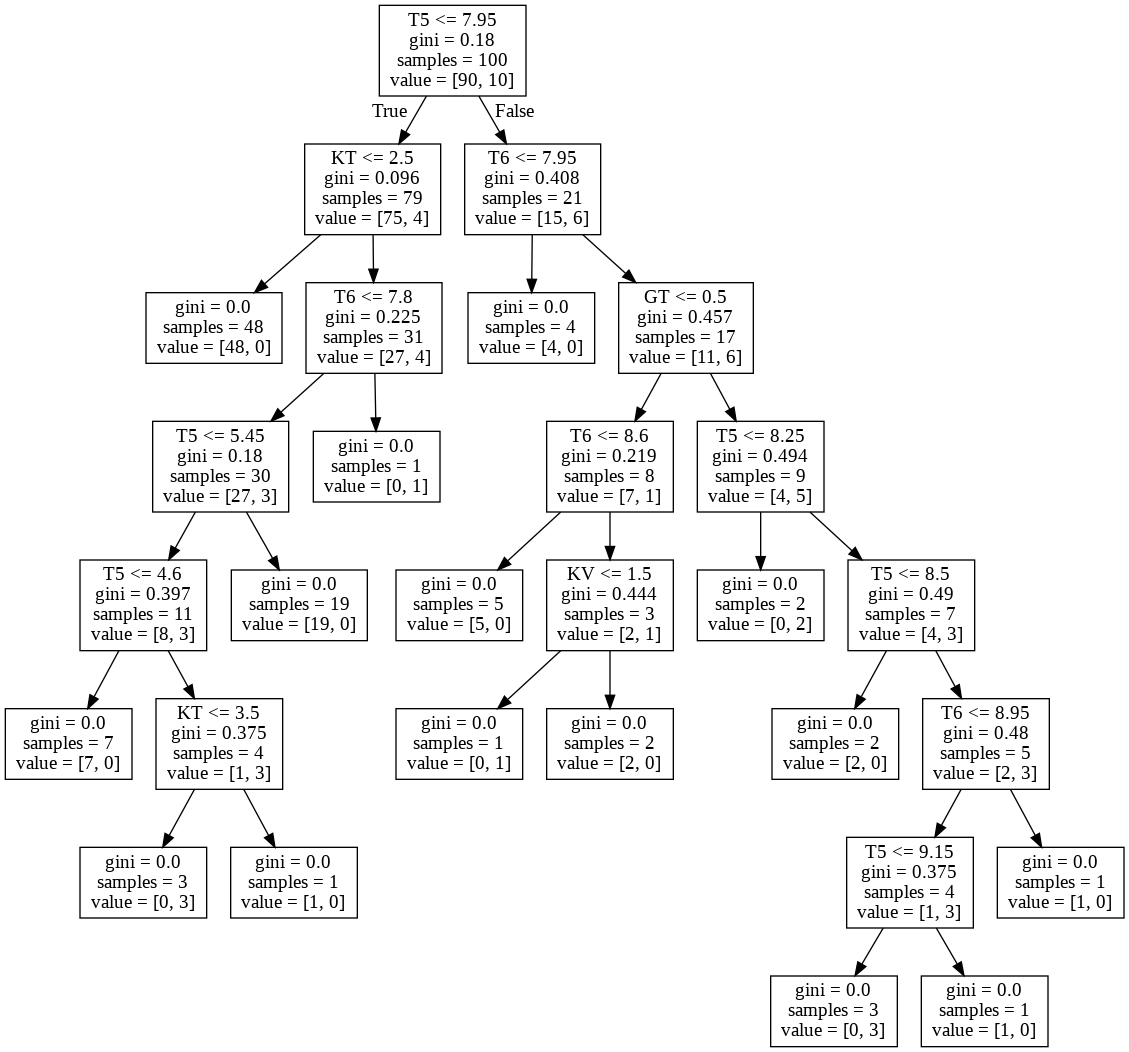

In [22]:
from IPython.display import Image
Image(filename='/content/mytree.png') 
